In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df

,Unnamed: 0,Preço,Marca,Modelo,GPU,Unidades de Processamento,Tamanho da Memória (GB),Velocidade da Memória (Gbps),Tipo da Memória,Interface da Memória (Bits),Fonte Recomendada (W),Garantia (Meses),Peso
0,0,2699.99,MSI,Radeon RX 6750 XT MECH 2X 12G OC,AMD,2560,12.0,18.0,GDDR6,192.0,650.0,36.0,1474.0
1,1,2299.99,ASUS,Dual RTX 3060 O12G V2,NVIDIA,3584,12.0,15.0,GDDR6,192.0,650.0,12.0,880.0
2,2,1559.99,ASRock,AMD Radeon RX 6600 CLD 8G,AMD,1792,8.0,14.0,GDDR6,128.0,500.0,12.0,627.0
3,3,1739.99,PNY,VCG30508DFMPB,NVIDIA,2560,8.0,NaN,GDDR6,128.0,NaN,36.0,1052.0
4,4,2499.99,PNY,VCG306012DFBPB1,NVIDIA,3584,12.0,15.0,GDDR6,192.0,NaN,36.0,990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,1245,NaN,Pny,NVIDIA QUADRO T600,NVIDIA,640,4.0,NaN,GDDR6,128.0,NaN,12.0,450.0
1246,1246,NaN,MSI Modelo: 912-V389-205 Motor gráfico: NVIDIA...,912-V389-205 Motor gráfico: NVIDIA® GeForce RT...,NVIDIA,NaN,10.0,19.0,GDDR6X,NaN,912.0,12.0,3000.0
1247,1247,NaN,Galax,Geforce GTX 1660 Super 6GB,NVIDIA,1408,6.0,14.0,GDDR6,192.0,125.0,3.0,1070.0
1248,1248,NaN,Pcwinmax,Geforce Gt 740,NVIDIA,192,4.0,NaN,NaN,128.0,NaN,6.0,4000.0


## Medidas de Tendência Central

### Média

#### Média de Preço

In [4]:
df['Preço'].mean()

3834.822132352941

#### Média de Peso

In [5]:
df['Peso'].mean()

1430.2224080267558

#### Média de Unidades de Processamento

In [33]:
df_cores = df

In [34]:
df_cores['Unidades de Processamento'] = pd.to_numeric(df_cores['Unidades de Processamento'], errors='coerce')

In [8]:
df_cores['Unidades de Processamento']

0       2560.0
1       3584.0
2       1792.0
3       2560.0
4       3584.0
         ...  
1245     640.0
1246       NaN
1247    1408.0
1248     192.0
1249       NaN
Name: Unidades de Processamento, Length: 1250, dtype: float64

In [35]:
# Removendo valores errados
count = 0
indices = []
for linha in range(len(df_cores)):
    if df_cores['Unidades de Processamento'].iloc[linha] > 20000:
        count += 1
        indices.append(linha)
print(count)

63


In [36]:
df_cores = df_cores.drop(indices)

In [12]:
df_cores['Unidades de Processamento'].mean()

3877.1986206896554

### Mediana

#### Preço

In [13]:
df['Preço'].median()

2199.995

#### Peso

In [14]:
df['Peso'].median()

1063.0

#### Unidades de Processamento

In [15]:
df_cores['Unidades de Processamento'].median()

2560.0

### Moda

#### Garantia

In [16]:
df['Garantia (Meses)'].value_counts()

Garantia (Meses)
12.0    673
3.0     392
36.0     94
24.0     38
6.0      15
0.0       7
48.0      3
90.0      2
9.0       1
Name: count, dtype: int64

In [17]:
print("Moda Garantia:")
df['Garantia (Meses)'].mode()

Moda Garantia:


0    12.0
Name: Garantia (Meses), dtype: float64

#### GPU

In [18]:
df['GPU'].value_counts()

GPU
NVIDIA    880
AMD       225
Intel       4
Name: count, dtype: int64

In [19]:
print("Moda GPU: ")
df['GPU'].mode()

Moda GPU: 


0    NVIDIA
Name: GPU, dtype: object

## Medidas de Variabilidade

### Desvio

In [21]:
media_precos = df['Preço'].mean()
media_precos

3834.822132352941

In [22]:
d = df['Preço'].apply(lambda x: x - media_precos)
d

0      -1134.832132
1      -1534.832132
2      -2274.832132
3      -2094.832132
4      -1334.832132
           ...     
1245            NaN
1246            NaN
1247            NaN
1248            NaN
1249            NaN
Name: Preço, Length: 1250, dtype: float64

### Variância

In [23]:
df['Preço'].var()

18663135.85231294

### Desvio Padrão

In [24]:
df['Preço'].std()

4320.085167252255

## Boxplot

<Axes: >

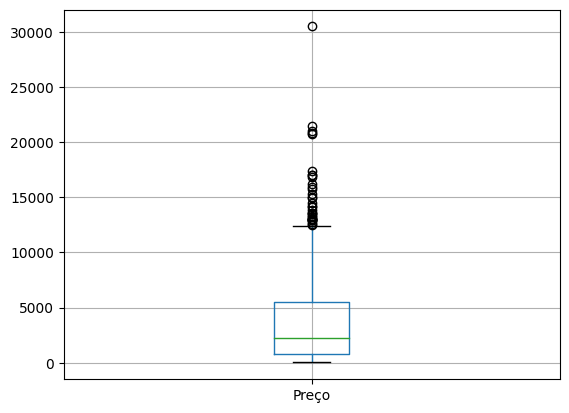

In [29]:
df.boxplot(column=['Preço'])

<Axes: title={'center': 'Preço'}, xlabel='GPU'>

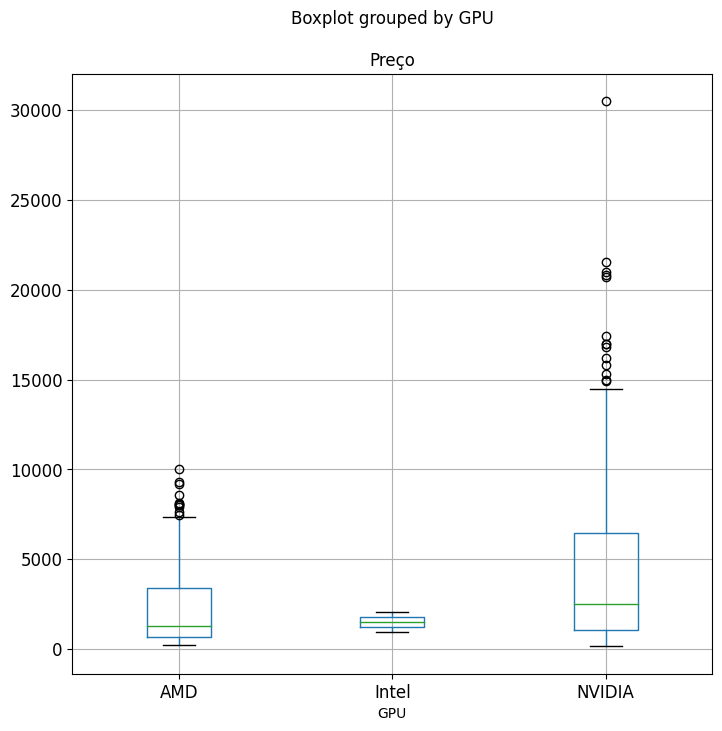

In [26]:
df.boxplot(by='GPU', column=['Preço'], fontsize='large', figsize=(8,8))

## Tabelas de Frequência e Histogramas

In [22]:
import matplotlib.pyplot as plt

In [4]:
count_memory_type = df['Tipo da Memória'].value_counts()
count_memory_type.count()

40

### Tipos de Memória

#### Bruto

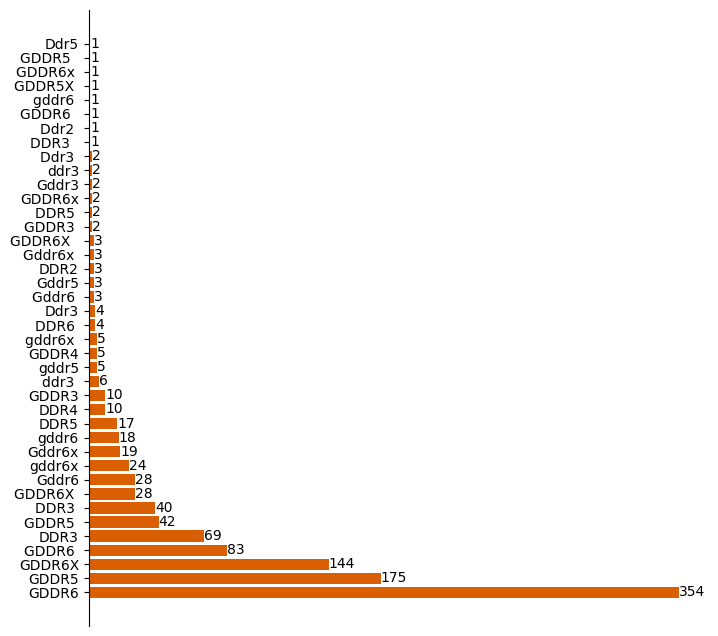

In [57]:
count_memory_type = df['Tipo da Memória'].value_counts()
top_memory_type = count_memory_type.head(40)

fig, ax = plt.subplots(figsize=(8, 8))
bars = plt.barh(top_memory_type.index, top_memory_type.values, color='#d95f02')
ax.spines[['right', 'top', 'bottom']].set_visible(False)
ax.xaxis.set_visible(False)
ax.bar_label(bars)
plt.show()

In [75]:
import math

In [4]:
df_memory_type = df

#### Removendo Espaços e Valores NaN

In [5]:
for linha in range(len(df_memory_type)):
    df_memory_type['Tipo da Memória'].at[linha] = str(df_memory_type['Tipo da Memória'].iloc[linha]).strip()

In [6]:
count = 0
indices = []
for linha in range(len(df_memory_type)):
    if df_memory_type['Tipo da Memória'].iloc[linha] == 'nan':
        count += 1
        indices.append(linha)
print(count)

125


In [7]:
df_memory_type = df_memory_type.drop(indices)

In [10]:
count_memory_type = df_memory_type['Tipo da Memória'].value_counts()
count_memory_type.count()

23

In [ ]:
df_memory_type = df_memory_type.reset_index()

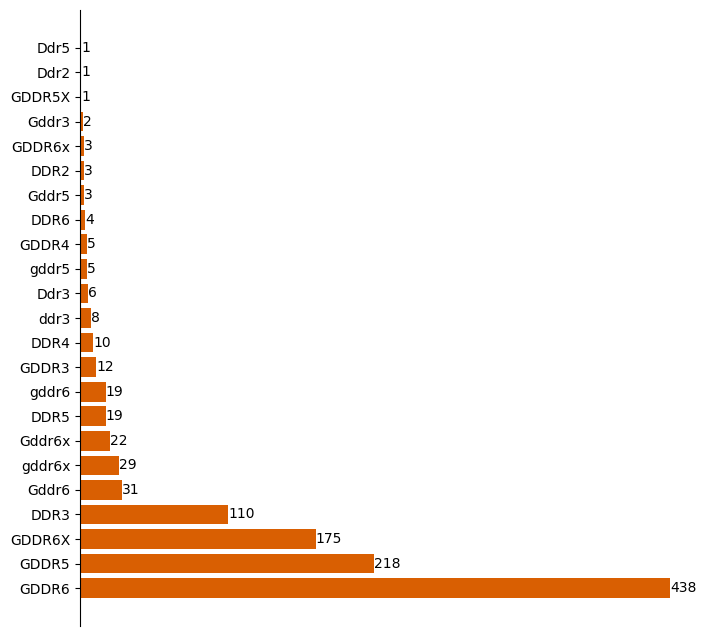

In [23]:
top_memory_type = count_memory_type.head(23)

fig, ax = plt.subplots(figsize=(8, 8))
bars = plt.barh(top_memory_type.index, top_memory_type.values, color='#d95f02')
ax.spines[['right', 'top', 'bottom']].set_visible(False)
ax.xaxis.set_visible(False)
ax.bar_label(bars)
plt.show()

#### Limpeza final

In [24]:
df_memory_type_upper = df_memory_type
for linha in range(len(df_memory_type_upper)):
    df_memory_type_upper['Tipo da Memória'].at[linha] = str(df_memory_type_upper['Tipo da Memória'].iloc[linha]).upper()

In [25]:
count_memory_type = df_memory_type_upper['Tipo da Memória'].value_counts()
count_memory_type.count()

11

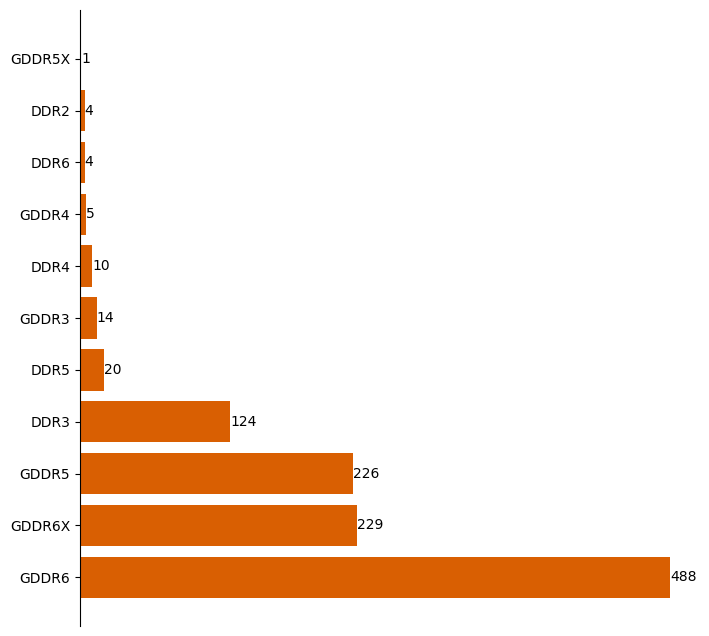

In [26]:
top_memory_type = count_memory_type.head(11)

fig, ax = plt.subplots(figsize=(8, 8))
bars = plt.barh(top_memory_type.index, top_memory_type.values, color='#d95f02')
ax.spines[['right', 'top', 'bottom']].set_visible(False)
ax.xaxis.set_visible(False)
ax.bar_label(bars)
plt.show()

### Unidades de Processamento

In [70]:
cores = df_cores['Unidades de Processamento']


In [71]:
k = math.ceil(1 + 3.3 * math.log10(cores.size))
k

12

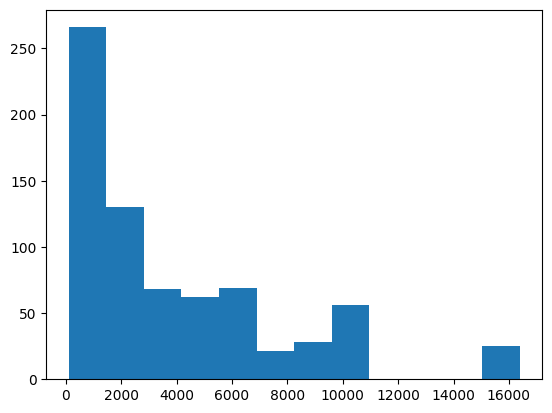

In [72]:
plt.hist(cores, bins=k)
plt.show()

In [73]:
k = int(math.sqrt(cores.size))
k

34

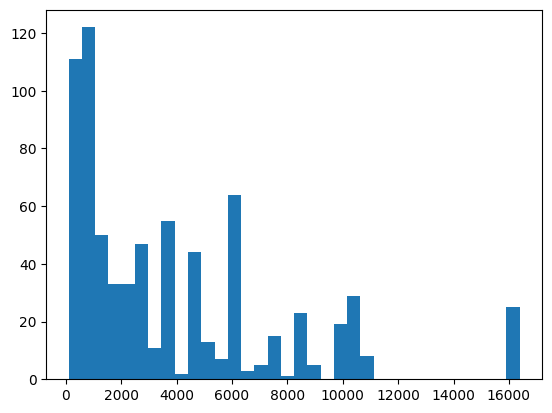

In [74]:
plt.hist(cores, bins=k)
plt.show()